# مشروع تحليل بيانات تصاريح تطبيق نُسُك لعام ١٤٤٤هـ 

In [136]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import arabic_reshaper
from bidi.algorithm import get_display

In [137]:
# Read csv file
df = pd.read_csv('number-of-permits-from-the-nsk.csv')

# تقييم البيانات

In [138]:
# Display the first five rows of the DataFrame using .head
df.head()

,عدد التصاريح من نسك,نوع التصريح,الجنس,اليوم
0,10815,روضة رجال,ذكر,1444/1/3
1,10591,روضة نساء,أنثى,1444/2/4
2,73039,عمرة,ذكر,1444/1/7
3,8092,روضة رجال,ذكر,1444/1/16
4,14544,روضة نساء,أنثى,1444/3/12


In [139]:
# Display the last five rows of the DataFrame using .tail
df.tail()

,عدد التصاريح من نسك,نوع التصريح,الجنس,اليوم
1714,1,روضة نساء,ذكر,1444/10/19
1715,1,روضة رجال,أنثى,1444/5/23
1716,1,روضة رجال,أنثى,1444/6/8
1717,1,روضة رجال,أنثى,1444/10/29
1718,1,روضة رجال,أنثى,1444/9/5


In [140]:
# Display a basic summary of the DataFrame using .info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   عدد التصاريح من نسك  1719 non-null   int64 
 1   نوع التصريح          1719 non-null   object
 2   الجنس                1719 non-null   object
 3   اليوم                1719 non-null   object
dtypes: int64(1), object(3)
memory usage: 53.8+ KB


In [141]:
# Display the entry counts using .value_counts
df.value_counts("نوع التصريح")

نوع التصريح
عمرة         708
روضة نساء    576
روضة رجال    435
Name: count, dtype: int64

In [142]:
# Display the entry counts using .value_counts
df.value_counts("الجنس")

الجنس
ذكر     930
أنثى    789
Name: count, dtype: int64

In [143]:
# Count of missing values in each column
df.isnull().sum()

عدد التصاريح من نسك    0
نوع التصريح            0
الجنس                  0
اليوم                  0
dtype: int64

In [144]:
# Count of duplicate rows 
df.duplicated().sum()

0

### :ملخص التقييم 

هناك ٤ أعمدة و ١٧١٩ صف 
 
 :الأعمدة هي
 
 `عدد التصاريح من نسك` : عدد التصاريح التي تم إصدارها من تطبيق نُسك لعام ١٤٤٤هـ

 `نوع التصريح` : تصريح عمرة، تصريح زيارة للروضة للرجال، تصريح زيارة للروضة للنساء

 `الجنس` : ذكر و أنثى

 `اليوم` : تاريخ إصدار التصريح

من خلال التقييم نلاحظ أنَّ جودة البيانات عالية لا يوجد بيانات مفقودة أو خالية، عناوين الأعمدة واضحة ووصفية، نوع البيانات صحيح لكل عمود ماعدا عمود اليوم، لا يوجد تكرارات للبيانات.

سأحتاج فقط لفصل اليوم و الشهر من عمود `اليوم` لاستخدامه في تحليلي، سأقوم بحذف السنة؛ لأنها ستكون لجميع البيانات ١٤٤٤هـ. 

# تنظيف البيانات

كما لاحظنا في القسم السابق أن البيانات نظيفة لا نحتاج إلا لفصل عمود `اليوم` إلى عمود للشهر وعمود لليوم لاحتياجي له في تحليلي وحذف عمود `اليوم` بعد الفصل

In [145]:
# Extract month and day from 'اليوم' column
df["الشهر"] = df["اليوم"].apply(lambda x : x.split("/")[1])
df["اليوم_"] = df["اليوم"].apply(lambda x : x.split("/")[2])

# Check for Extracting
df.head()

,عدد التصاريح من نسك,نوع التصريح,الجنس,اليوم,الشهر,اليوم_
0,10815,روضة رجال,ذكر,1444/1/3,1,3
1,10591,روضة نساء,أنثى,1444/2/4,2,4
2,73039,عمرة,ذكر,1444/1/7,1,7
3,8092,روضة رجال,ذكر,1444/1/16,1,16
4,14544,روضة نساء,أنثى,1444/3/12,3,12


In [146]:
# Delete 'اليوم' column
df.drop(["اليوم"], axis = 1, inplace = True)

# Check for Deleting
df.head()

,عدد التصاريح من نسك,نوع التصريح,الجنس,الشهر,اليوم_
0,10815,روضة رجال,ذكر,1,3
1,10591,روضة نساء,أنثى,2,4
2,73039,عمرة,ذكر,1,7
3,8092,روضة رجال,ذكر,1,16
4,14544,روضة نساء,أنثى,3,12


In [147]:
# Check for column dtypes
df.dtypes

عدد التصاريح من نسك     int64
نوع التصريح            object
الجنس                  object
الشهر                  object
اليوم_                 object
dtype: object

نحتاج إلى تحويل نوع البيانات لعمود الشهر واليوم_  من نص إلى رقم صحيح

In [148]:
# Convert 'الشهر' and 'اليوم_' columns to int64
df['الشهر'] = df['الشهر'].astype(int)
df['اليوم_'] = df['اليوم_'].astype(int)

# Check for column dtypes
df.dtypes

عدد التصاريح من نسك     int64
نوع التصريح            object
الجنس                  object
الشهر                   int64
اليوم_                  int64
dtype: object

# التحليل الإستكشافي للبيانات

### ماهو إجمالي عدد التصاريح التي تم إصداراها من تطبيق نُسُك في عام ١٤٤٤هـ؟

In [169]:
# Sum all permints issued in 1444 Hijri
total_permits = df['عدد التصاريح من نسك'].sum()
total_permits

31729066

.في عام ١٤٤٤هـ تم إصدار مايقارب ٣٢ مليون تصريح من تطبيق نُسُك

In [192]:
total_types= df.groupby('نوع التصريح').agg({'عدد التصاريح من نسك': ['sum']})
total_types

,عدد التصاريح من نسك
,sum
نوع التصريح,
روضة رجال,4964037
روضة نساء,4930131
عمرة,21834898


<Axes: ylabel='عدد التصاريح من نسك'>

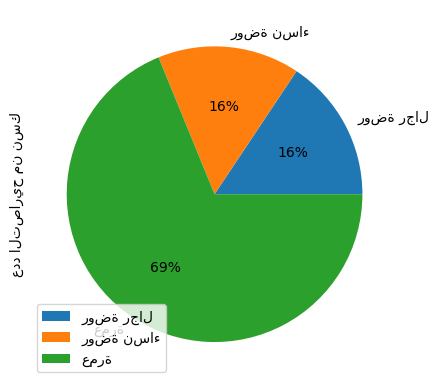

In [195]:
pie_types =df.groupby(['نوع التصريح']).sum().plot(kind='pie', y='عدد التصاريح من نسك',autopct='%1.0f%%')
pie_types

### ماهو أقل وأعلى عدد تصريح تم إصداره من تطبيق نُسُك؟ وماهو المتوسط لعدد التصاريح؟

In [170]:
# Calculate descriptive statistics for each numeric variable
df['عدد التصاريح من نسك'].describe()

count      1719.000000
mean      18457.862711
std       22200.683072
min           1.000000
25%        8068.500000
50%       15467.000000
75%       21203.000000
max      160304.000000
Name: عدد التصاريح من نسك, dtype: float64

:عام ١٤٤٤هـ

أقل عدد تصاريح من تطبيق نُسك كان **تصريح واحد** فقط 

أعلى عدد تصاريح من تطبيق نُسك كان **160,304** تصريح

متوسط عدد التصاريح لهذا العام كان **18,457** تصريح

### ماهو نوع التصريح الذي يملك أعلى عدد تصاريح وتاريخ كم تم إصداره؟

In [171]:
# retrieving rows by loc method
max_permits = df.loc[df["عدد التصاريح من نسك"] == 160304,:]


# display
max_permits

,عدد التصاريح من نسك,نوع التصريح,الجنس,الشهر,اليوم_
1430,160304,عمرة,ذكر,9,27


كان أعلى عدد تصاريح من تطبيق نُسك هي عدد تصاريح العمرة التي تم إصدارها في يوم ٢٧ رمضان حيث كان عددها ما يقارب ١٦٠ ألف تصريح عمرة للرجال  

In [151]:
b = df.loc[(df["اليوم_"] == 27) & (df["الشهر"] == 9) & (df["نوع التصريح"] == "عمرة")]
b

,عدد التصاريح من نسك,نوع التصريح,الجنس,الشهر,اليوم_
1430,160304,عمرة,ذكر,9,27
1631,75344,عمرة,أنثى,9,27



تصاريح العمرة للنساء في يوم ٢٧ رمضان كانت مايقارب ٧٥ ألف تصريح عمرة

###  هل هناك 

In [161]:
male = df.loc[(df["نوع التصريح"] == "روضة نساء") & (df["الجنس"] == "ذكر")]
male

,عدد التصاريح من نسك,نوع التصريح,الجنس,الشهر,اليوم_
190,41,روضة نساء,ذكر,1,13
191,41,روضة نساء,ذكر,6,25
192,2,روضة نساء,ذكر,7,23
193,5,روضة نساء,ذكر,6,4
194,17,روضة نساء,ذكر,5,14
...,...,...,...,...,...
1707,1,روضة نساء,ذكر,10,17
1708,1,روضة نساء,ذكر,4,19
1709,1,روضة نساء,ذكر,8,24
1710,1,روضة نساء,ذكر,12,3


In [153]:
female = df.loc[(df["نوع التصريح"] == "روضة رجال") & (df["الجنس"] == "أنثى")]
female

,عدد التصاريح من نسك,نوع التصريح,الجنس,الشهر,اليوم_
213,2,روضة رجال,أنثى,1,8
214,5,روضة رجال,أنثى,1,14
215,1,روضة رجال,أنثى,4,1
216,1,روضة رجال,أنثى,10,5
217,1,روضة رجال,أنثى,10,6
...,...,...,...,...,...
1713,1,روضة رجال,أنثى,10,25
1715,1,روضة رجال,أنثى,5,23
1716,1,روضة رجال,أنثى,6,8
1717,1,روضة رجال,أنثى,10,29


In [154]:
# Define a function that reshape arabic columns 
def f(x):
    out=get_display( arabic_reshaper.reshape(x))
    return(out)

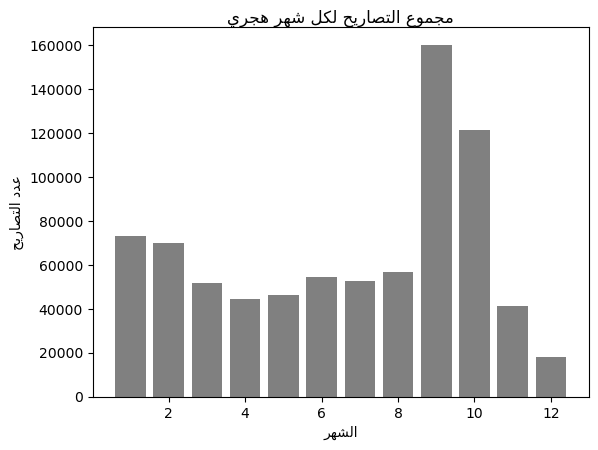

In [177]:
x = df["الشهر"]
y = df["عدد التصاريح من نسك"]
xlbl = get_display( arabic_reshaper.reshape('الشهر'))
ylbl = get_display( arabic_reshaper.reshape('عدد التصاريح'))
label = get_display(arabic_reshaper.reshape("مجموع التصاريح لكل شهر هجري")) 
          
plt.bar(x, y, label='Bar1', color='gray')
plt.xlabel(xlbl, fontdict=None, labelpad=None)
plt.ylabel(ylbl, fontdict=None, labelpad=None)
plt.title (label, fontweight=10, pad='2.0')
plt.show()

.أكثر شهر تم إصدار تصاريح فيه كان الشهر التاسع الهجري أي شهر رمضان المبارك بما يقارب ١٦٠ ألف تصريح

.أقل شهر تم إصدار تصاريح فيه كان الشهر الثاني عشر هجرياً أي موسم الحج بما يقارب ٢٠ ألف تصريح

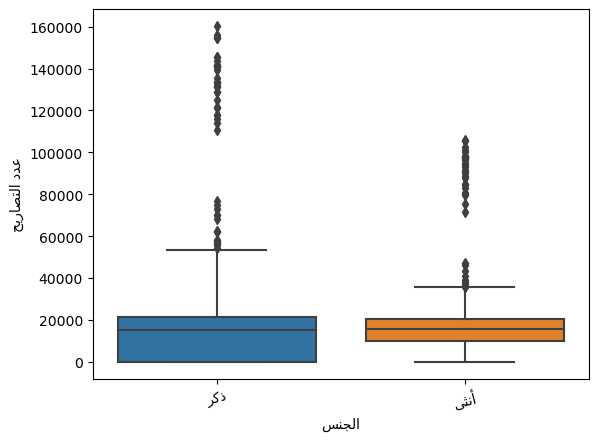

In [186]:

gender = df['الجنس'].apply(f)

sns.boxplot(data=df, x=gender, y='عدد التصاريح من نسك').set(xlabel= get_display( arabic_reshaper.reshape('الجنس')),  
                                                                              ylabel= get_display( arabic_reshaper.reshape('عدد التصاريح')))
plt.xticks(rotation=15);

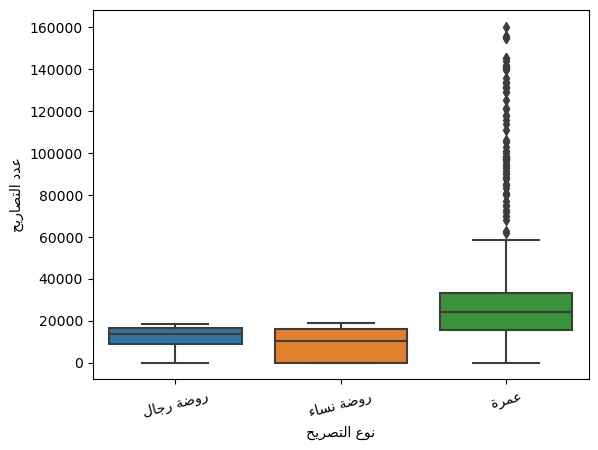

In [181]:

permit_type = df['نوع التصريح'].apply(f)

sns.boxplot(data=df, x=permit_type, y='عدد التصاريح من نسك').set(xlabel= get_display( arabic_reshaper.reshape('نوع التصريح')),  
                                                                              ylabel= get_display( arabic_reshaper.reshape('عدد التصاريح')))
plt.xticks(rotation=15);

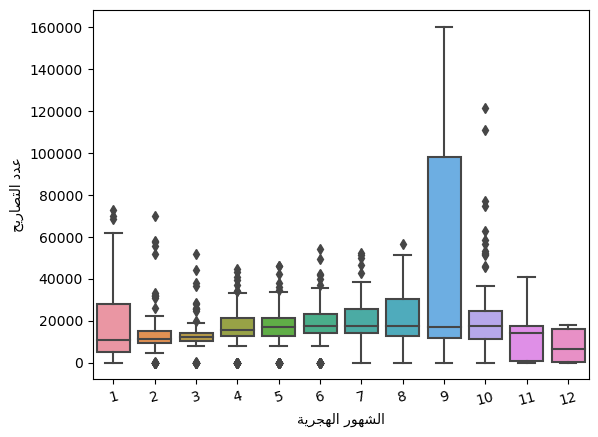

In [175]:

sns.boxplot(data=df, x='الشهر', y='عدد التصاريح من نسك').set(xlabel= get_display( arabic_reshaper.reshape('الشهور الهجرية')),  
                                                                                ylabel= get_display( arabic_reshaper.reshape('عدد التصاريح')))
plt.xticks(rotation=15);

### بالنسبة إلى تصاريح العمرة، من الأكثر إصداراً للتصاريح الرجال أم النساء؟

In [217]:
umrah_  = df.loc[(df["نوع التصريح"] == "عمرة")]
umrah_.head()

,عدد التصاريح من نسك,نوع التصريح,الجنس,الشهر,اليوم_
2,73039,عمرة,ذكر,1,7
6,33656,عمرة,ذكر,1,12
7,11990,عمرة,أنثى,3,12
8,24554,عمرة,ذكر,1,29
9,23393,عمرة,أنثى,4,10


In [216]:
umrah_gender = umrah_.groupby(['الجنس'])['عدد التصاريح من نسك'].sum()
umrah_gender

الجنس
أنثى     8984516
ذكر     12850382
Name: عدد التصاريح من نسك, dtype: int64

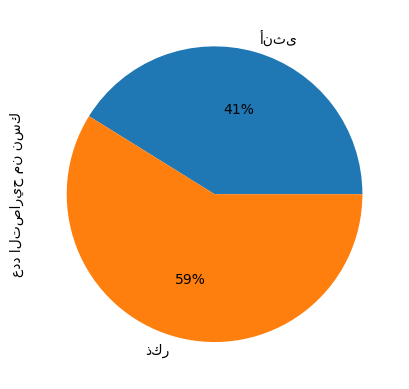

In [219]:
umrah_gender = umrah_.groupby(['الجنس'])['عدد التصاريح من نسك'].sum()
umrah_gender.plot(kind='pie', autopct='%1.0f%%');